# Lambda School Data Science Module 121
## Hypothesis Testing - One and Two-sample t-tests

#Objectives

* Explain the purpose of a t-test and identify applications
* Set up and run a one-sample t-test
* Set up and run a two-sample t-test


#Objective - Explain the purpose of a t-test and identify applications

#The Normal Distribution



*   "Bell shaped" curve
*   Most observations __________, few farther away



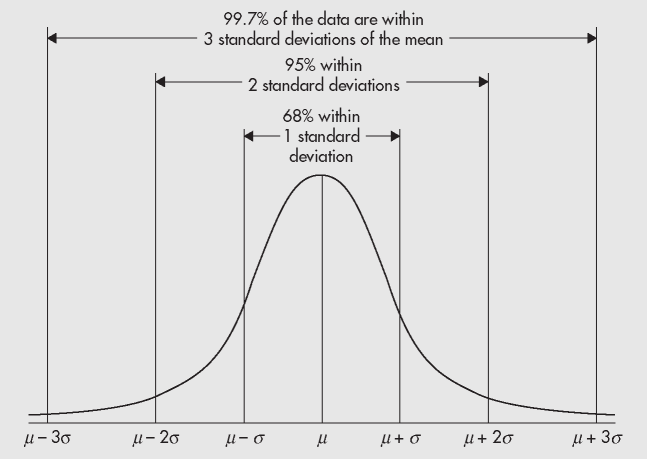

###Let's start with an example

The Bodytemp.csv file contains body temperature measurements for 223 healthy men and women aged 18-40 taken using an electronic digital thermometer. The mean body temperature from multiple measurements over three days was computed for each individual, and this summary measure is recorded.


Source: Mackowiak, P. A., Wasserman, S. S., and Levine, M. M. (1992), "A Critical Appraisal of 98.6 Degrees F, the Upper Limit of the Normal Body Temperature, and Other Legacies of Carl Reinhold August Wunderlich," Journal of the American Medical Association, 268, 1578-1580.

In [ ]:
import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Bodytemp.csv'

temperature = pd.read_csv(data_url)

print(temperature.shape)
temperature.head()

In [ ]:
import matplotlib.pyplot as plt

plt.hist(temperature['Body_temp'])

plt.xlabel('Body temperature in degrees F')
plt.ylabel('Frequency')
plt.title(r'Distribution of Human Body Temperature')

plt.show()

###A __________ tells you the __________ of a variable and __________.

**The Central Limit Theorem** tells us that, no matter what kind of distribution a sample of observations are drawn from, so long as the sample size is large enough (about 30-40) the sample mean will have a Normal distribution with a mean equal to the population mean.

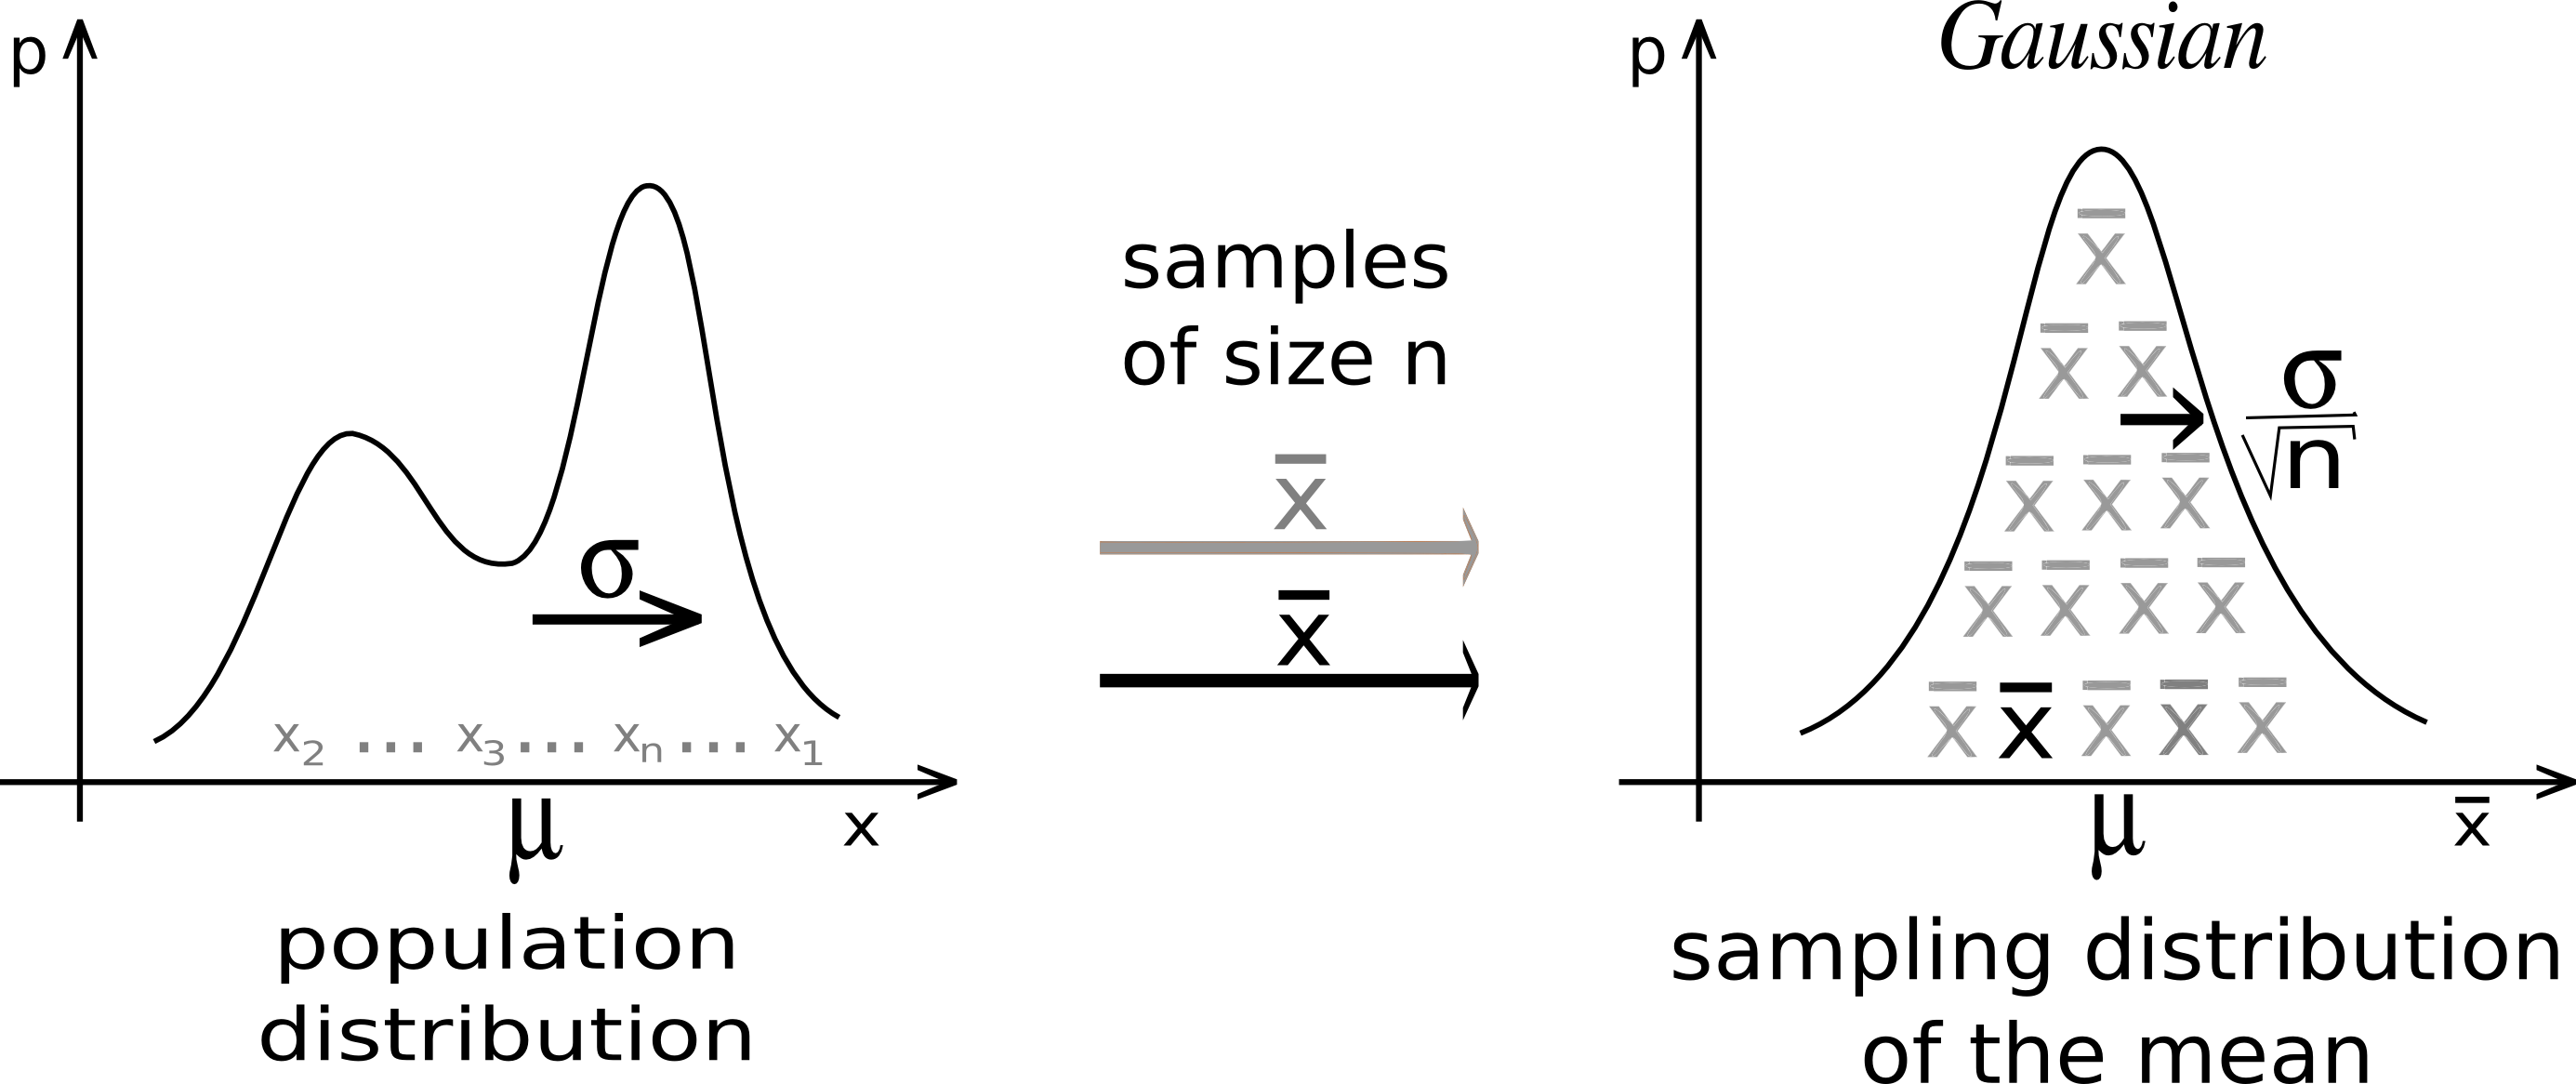

###Two incredibly important things to keep in mind when talking about the Central Limit Theorem


*   It tells us about the distribution of __________ not individual observations.
*   It tells us that, __________.



#Introducing the t-distribution

While the Central Limit Theorem works perfectly in theory, in reality, the distribution of a sample mean will not be exactly Normal.

Instead, the sample mean follows what is called a __________.  The t-distribution has a similar shape to the Normal distribution but it is able to flex depending on the sample size.  The t-distribution is able to __________.

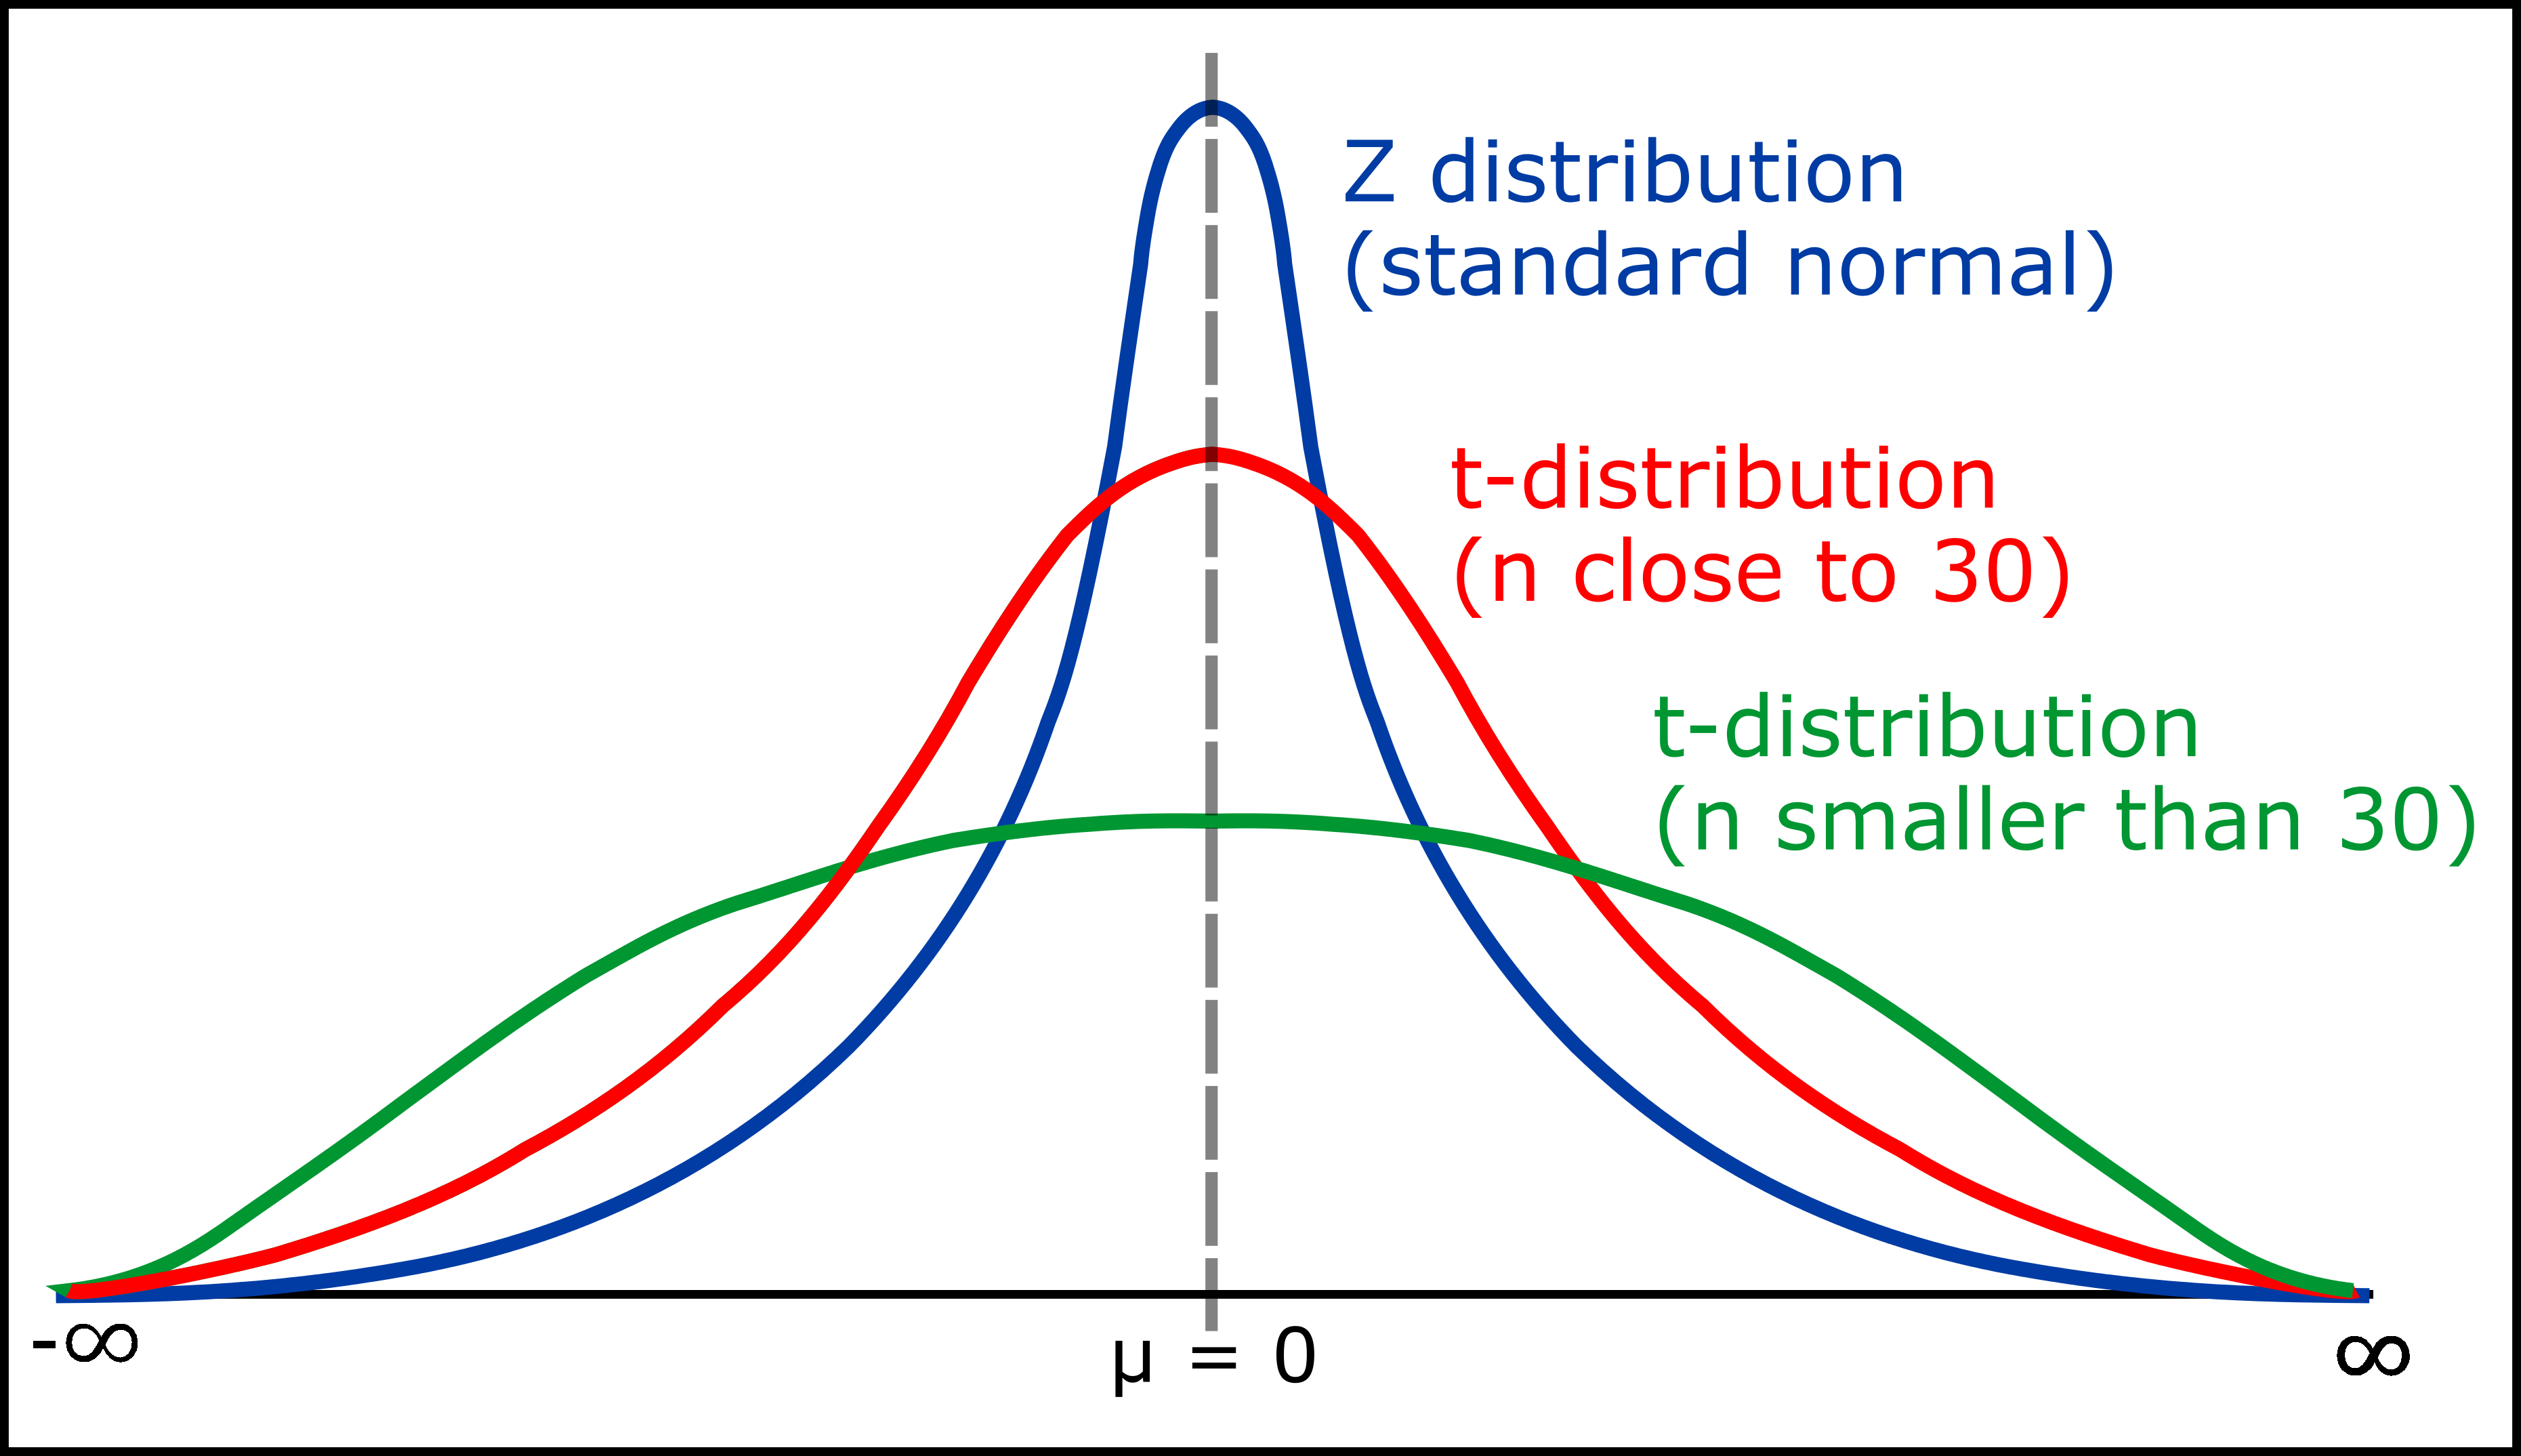

The t-distribution was discovered/invented by [William Sealy Gosset](https://en.wikipedia.org/wiki/William_Sealy_Gosset) when he was working at the Guiness Brewery.

His results were published under the pseudonym "Student T-Test.

# Statistical Inference - We're almost there!

Previously we've used descriptive statistics (mean, median, standard deviation, etc.) to describe data from a sample.  However, the more interesting question is: 


*   What (if anything) can we learn about a population from the information we gather from a sample?








![Inferential Statistics](https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg)

# Examples of populations:

- 


#And now for t-tests.

###**A t-test is __________**

# Examples of hypotheses:

- The mean age of ALL US college students is 23 years
- The proportion of ALL students globally who are pursuing a CS education who are female is 41%
- The mean tastiness rating ALL twinkies rolling off a production line is 9.76
- The proportion of ALL blue whales in the wild that have been radio tagged by scientists is 67%

#Objective - Set up and run a one-sample t-test

# A Business Case

Source: A.N. Garand and L.N. Bell (1997). "Caffeine Content of Fountain and Private-Label Store Brand Carbonated Beverages," Journal of the American Dietetic Association, Vol. 97, #2, pp. 179-182.



Soft drinks like Coke and Pepsi are manufactured to have a standard caffeine content. For example, a 12-oz serving of Coke has 34 mg of caffeine, and a 12-oz serving of Pepsi has 37.6 mg of caffeine. However, fountain soft drinks are typically mixed in individual restaurant dispensers, so it is more difficult to maintain a standard level of caffeine per serving. 

Imagine you are in a quality assurance role at Coke assigned to ensure that franchise restaurants that serve Coke beverages are maintaining product consistancy.  In particular, you wish to ensure that Coke mixed in fountain soft drink dispensers has the standard caffeine content of 34 mg per 12 oz (the same as in a 12 oz can of Coke).  If the caffeine content is very different than 34 mg per 12 oz, that indicates managers of the franchises should be retrained.

The Soda dataset contains the records of 50 12 oz samples of Coke collected from a set of franchise restaurants.

In [1]:
import pandas as pd

data_url = 'https://raw.githubusercontent.com/dansmyers/Statistics/master/Soda.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(df.shape)
df.head()

(50, 2)


,Drink,Caffeine
0,1,47.32
1,2,43.78
2,3,48.12
3,4,43.25
4,5,46.42


# Hypotheses and Significance Levels

###Null Hypothesis

The null hypothesis in a 1-sample t-test is that the population mean is equal to some __________.

Stated in mathematical terms:

$H_0: __________

Where $\mu$ is the __________.

The null hypothesis always contains an "__________"


In the Coke example, we wish to test the hypothesis that the mean caffeine content in ALL fountain Cokes is 34 mg per 12oz serving.
$H_0: \mu =$ __________

###Alternative Hypothesis

The alternative hypothesis lays out an alternative possibility if the null hypothesis is not correct.

$H_a: \mu \neq$ __________

We can also propose that the population mean is really greater than or less than the reference value, but in general, it's better to be "conservative" and use the "not equal to" alternative hypothesis.

In the Coke example, our alternative hypothesis is that the mean caffeine content in all 12 oz servings of fountain Coke is **not** 34mg.

$H_a: \mu \neq$ __________

###Sigificance Level

The significance level is threshold that we pick to determine whether we reject or fail to reject our null hypothesis.  The significance level is often set at __________, but it doesn't have to be.

# **Important note!**

We always write our hypotheses and pick our significance level __________ we do any data analysis.

# General idea behind the t-test

Mathematically, we know that if the mean caffeine content in all fountain soda is 34mg per 12 oz, most samples we take from that population will have a mean that is very close to 34mg per 12 oz.
![alt text](https://raw.githubusercontent.com/dansmyers/Statistics/master/Normal%20dist%202.png)


![alt text](https://raw.githubusercontent.com/dansmyers/Statistics/master/Normal%20dist%203.png)

We can calculate the mean caffeine content in our sample to get a sense of how much larger or smaller it is than the null hypothesis.

In [ ]:
print(df[['Caffeine']].mean())

The mean caffeiene content in the sample of fountain Coke we've collected is 37.9mg per 12 oz serving.

![alt text](https://raw.githubusercontent.com/dansmyers/Statistics/master/Normal%20dist%201.png)

In [11]:
pval = st.stats.ttest_1samp(df['Caffeine'], 34)
pval

Ttest_1sampResult(statistic=5.313255802097796, pvalue=2.620466428255138e-06)

34.5

#The t-statistic and p-value

A __________ is a measure of how different our __________ is from the mean __________. The larger the __________ (in either the positive or negative direction), the __________ it is that we would see our sample mean if the null hypothesis is truly correct.

$$t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

The __________ is the probability of observing our sample mean if the null hypothesis is correct.


![alt text](https://raw.githubusercontent.com/dansmyers/Statistics/master/Normal%20dist%204.png)


![alt text](https://raw.githubusercontent.com/dansmyers/Statistics/master/Normal%20dist%205.png)

#Python Code
We're going to use the t.test_1samp function to calculate the t-statistic and p-value for a hypothesis test.  The Python code is the form:

### st.stats.ttest_1samp(variable, mean under Ho)

And the output looks like:

### (t-statistic, p-value)


#Putting it all together in the Coke example

Null hypothesis: The mean caffeine content in ALL 12 oz servings of fountain Coke is __________ (the same as the caffeine content in a 12 oz can of Coke).

Alternative hypothesis: The mean caffeine content in ALL 12 oz servings of fountain Coke is __________.

$H_0: \mu =$ __________

$H_a: \mu \neq$ __________




##We will __________ the null hypothesis if we have a p-value __________ our significance level.

### import scipy.stats as st

### st.stats.ttest_1samp( df['Caffeine'] , 34 )

In [3]:
import scipy.stats as st

pval = st.stats.ttest_1samp(df['Caffeine'], 34)

print(pval)


Ttest_1sampResult(statistic=5.313255802097796, pvalue=2.620466428255138e-06)


The t-statistic = __________ and p-value = __________

Because the p-value = 0.00000262 < __________ (the significance level) we __________ the null hypothesis (that the mean caffeine content in all fountain Cokes __________ 34 mg per 12 oz serving) and conclude the __________ is correct (that the mean caffeine content in all fountain Cokes __________ 34 mg per 12 oz serving). 

#Common mistakes

1.   Because the p-value = 0.00000262 < 0.05 we fail to reject the null hypothesis and conclude that the mean caffeine content is not 34 mg per 12 oz serving.

2.   Failing to reject the null hypothesis means we've proved that the null hypothesis is true.








#Back to body temperature

Source: Mackowiak, P. A., Wasserman, S. S., and Levine, M. M.  (1992), "A Critical Appraisal of 98.6 Degrees F, the Upper Limit of the Normal Body Temperature, and Other Legacies of Carl Reinhold August Wunderlich," Journal of the American Medical Association_, 268, 1578-1580.



Everyone knows that 98.6 F (37.0 C) is the normal human body temperature.  But is that actually correct, and – come to think of it – how does everyone know that in the first place?

A German physician named Carl Reinhold August Wunderlich is generally credited with originating this idea, which was based on – reportedly – more than one million axiliary temperature readings taken from 25,000 subjects and was published in his 1868 book Das Verhalten der Eigenwärme in Krankheiten (which translates to The Behavior of the Self-Warmth in Diseases). But was he correct? History tells that his thermometer was a foot long and took 20 minutes to determine a subject’s temperature. For a measure that is used so often to determine general health, it would be a good idea to use modern instruments to confirm or refute his results.

In 1992, three physicians from the University of Maryland School of Medicine set out to do just that, measuring body temperatures for 223 healthy men and women aged 18-40 one to four times a day for three consecutive days using an electronic digital thermometer. The mean body temperature was computed for each individual, and this summary measure is recorded in the Bodytemp.xlsx dataset. We wish to determine if there is evidence for or against the claim that the mean healthy human body temperature is 98.6 F.

In [ ]:
import pandas as pd

temp_data_url = 'https://raw.githubusercontent.com/dansmyers/Statistics/master/Bodytemp.csv'

temp_df = pd.read_csv(temp_data_url, skipinitialspace=True, header=0)

print(temp_df.shape)
temp_df.head()

1. Write out the null and alternative hypotheses for this scenario in words and symbols.

2. Calculate the mean body temperature in the sample.

3. Conduct a 1-sample t-test to test your hypotheses.

4. Report your conclusion at the 0.05 significance level.

Null hypothesis: 

Alternative hypothesis: 

$H_0: \mu =$ 

$H_a: \mu \neq$ 

In [2]:
print(temp_df[['Body_temp']].mean())

temp_pval = st.stats.ttest_1samp(temp_df['Body_temp'], 98.6)

print(temp_pval)



NameError: name 'temp_df' is not defined

Conclusion: 

#Objective - Set up and run a two-sample t-test

#We can also conduct hypothesis tests to compare the means of two independent populations.

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

The Brainhead.csv dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

We wish to determine if there is a relationship between age and brain weight in healthy human adults.

In [ ]:
data_url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Brainhead.csv'

Brain_df = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(Brain_df.shape)
Brain_df.head()

Brain size is measured in g.

Age = 1: Individual was 20 - 46 years old

Age = 2: Individual was 46+ years old

The null hypothesis in a 2-independent-sample t-test is that the two population means are __________.  The alternative hypothesis is that the two population means are __________.

Stated in mathematical terms:

$H_0: __________$

$H_a: __________$

In this case, we wish to test the null hypothesis that older and younger people have the same mean brain weight vs. the alternative hypothesis that older and younger people have different brain weights.

Stated in mathematical terms:

$H_0: \mu_{younger} = \mu_{older}$

$H_a: \mu_{younger} \neq \mu_{older}$

We can use the two sample t-test function to test for a statistically significant difference at the alpha = 0.05 level.

In [ ]:
import numpy as np
from scipy import stats

younger_ = Brain_df[Brain_df.Age == 1]

younger = younger_t[['Brain']]


older_ = Brain_df[Brain_df.Age == 2]

older = older_t[['Brain']]

stats.ttest_ind(younger,older)

The p-value is 0.009 (rounded).  We reject Ho at the alpha = 0.05 level and conclude that there is a __________ in the mean brain weight between individuals younger than 46 years old and individuals 46 years and older.

### A Note

Before we proceed further, **be wary that neither the null hypothesis or the alternative hypothesis can be unequivocally proven correct within hypothesis testing**. Analyzing a sample extracted from a larger population is a subset of the data, and thus, any conclusions formed about the larger population based on analyzing the sample data are considered probabilistic rather than absolute. The sample data can only support that the null hypothesis or the alternative hypothesis is probable with a minimal error of interpretation.

Theobald, Oliver. Statistics for Absolute Beginners (Second Edition) (pp. 76-77). Scatterplot Press. Kindle Edition. 

## Breakout 

In [2]:
import pandas as pd
Titanic = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Titanic/Titanic.csv')


As a group:
- Determine what your null and alternative hypothesis will be. 
- Use the two-sample t-test function to test for a statistically significant difference in ages for both gender. Set your alpha = 0.05 level.

Ttest_indResult(statistic=array([2.74479955]), pvalue=array([0.00617743]))

#The director's cut.  

Writing your own functions to calculate the mean, SDS, t-statistic and p-value.

In [ ]:
#Mean


In [ ]:
#SD


In [ ]:
#t-statistic


In [ ]:
#p-value

from scipy import stats
from scipy.stats import t

In [ ]:
#print out all the results

from scipy import stats
from scipy.stats import t



In [ ]:
#Use the built in function



In [ ]:
#Run again for caffeine level